# **TP: Optimisation Bayésienne**

L'objectif de ce TP est d'implémenter l'optimisation bayésienne (ici la
méthode Efficient Global Optimization)

*Remarques générales:*
*   Le code n’est pas le but ultime du TP, c’est l’interprétation et l’analyse qui sont importantes.
*   Dans la forme, afficher des matrices de grande taille est illisible, préférer des figures. De même, lorsque des valeurs aberrantes apparaissent (nan, 10^18, ...), c’est sans doute le signe qu’il y a un problème. Enfin, c’est mieux de corriger les messages d’erreur.
*   Lorsque les résultats présentés sont aléatoires, il est importants de les répéter pour en fournir une analyse pertinente.

# Partie 1 : Génération de réalisations de processus stochastiques (1d)

On commence par générer des réalisations de vecteurs gaussiens avec
différentes fonctions de covariance. Par exemple, on testera ici les
covariances *gaussienne* et *exponentielle*: \\

$$k_G(\mathbf{x}, \mathbf{x}', {\theta}) =
\sigma^2 \exp \left( -||\mathbf{x} - \mathbf{x}'||^2 / \theta^2 \right)$$
et 
$$k_E(x, x',
{\theta}) = \sigma^2 \exp \left(- ||\textbf{x} - \textbf{x}'|| / \theta \right)$$  

($\mathbf{x}, \ \mathbf{x}' \in \mathbb{R}^d,\ \theta > 0, \ \sigma >0$). On considère également la covariance *du mouvement brownien* sur $\mathbb{R} \times \mathbb{R}$: $$k_B(\mathbf{x}, \mathbf{x}') = \min(\mathbf{x}, \mathbf{x}').$$

1. Coder les fonctions de covariance univariées correspondantes, en fonction de $\textbf{x}$, $\textbf{x}'$, $\theta$ et $\sigma$. Les représenter graphiquement en fonction de $\textbf{x} \in [-1,1]$ avec $\textbf{x}' = 0,$  $\theta = 0.2,$ $\sigma = 1$.

In [1]:
import numpy as np
#COVARIANCE GAUSSIENNE
def kg(x,z,theta,sigma):
    y=x-z
    return (sigma**2)*np.exp(-np.linalg.norm(y)**2/(theta**2))
#COVARIANCE EXPO
def ke(x,z,theta,sigma):
    y=x-z
    return (sigma**2)*np.exp(-np.linalg.norm(y)/(theta))
#COVARIANCE Brownien
def kb(x,z):
    return min(x,z)

In [2]:
import matplotlib.pyplot as plt
x=np.linspace(-1,1,100)
y=np.zeros(100)
t=np.zeros(100)
l=np.zeros(100)
for i in range(100):
    y[i]=kg(x[i],0,0.2,1)
    t[i]=ke(x[i],0,0.2,1)
    l[i]=kb(x[i],0)


Text(0.5, 1.0, 'covariance du mouvement brownien')

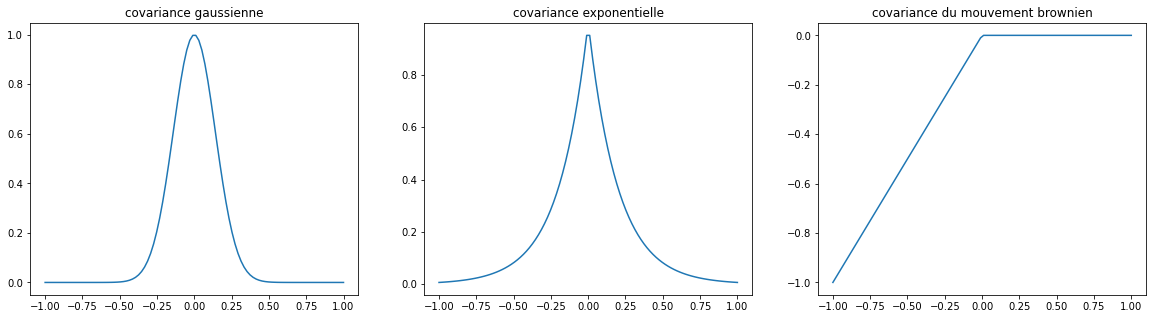

In [3]:
fig=plt.figure(1,figsize=(20,5))

plt.subplot(1,3,1)
plt.plot(x,y)
plt.title('covariance gaussienne')
plt.subplot(1,3,2)
plt.plot(x,t)
plt.title('covariance exponentielle')
plt.subplot(1,3,3)
plt.plot(x,l)
plt.title('covariance du mouvement brownien')

  --> Pour la covariance gaussienne, on constate que notre courbe possede une moyenne en 0 et un ecart type sigma, alors pour les observations proches de la moyenne, on a une covariance qui tend vers 1 portant plus on eloigne la covariance tend vers 0. <br>
  --> Pour la covariance exponentielle, elle tend exponentiellement vers 1 puis redescent. <br>
  --> Pour la covariance du mouvement brownien, la courbe est lineaire pour les observations negatives, apres la courbe devient plate en 0

2. Générer des réalisations de $\mathcal{N}(\mathbf{0}_{n'}, \mathbf{K}_{n'})$ sur l'intervalle $[0,1]$, sur une grille régulière $\mathcal{X}$ de taille $n'$ (e.g., avec un pas de $0.01$). 

$$[\mathbf{K}_{n'}]_{ij} = k_\cdot(\textbf{x}_i, \textbf{x}_j),  \ \ \ \textbf{x}_i, \textbf{x}_j \in \mathcal{X}.$$

Text(0.5, 1.0, 'Realisation covariance exponentielle')

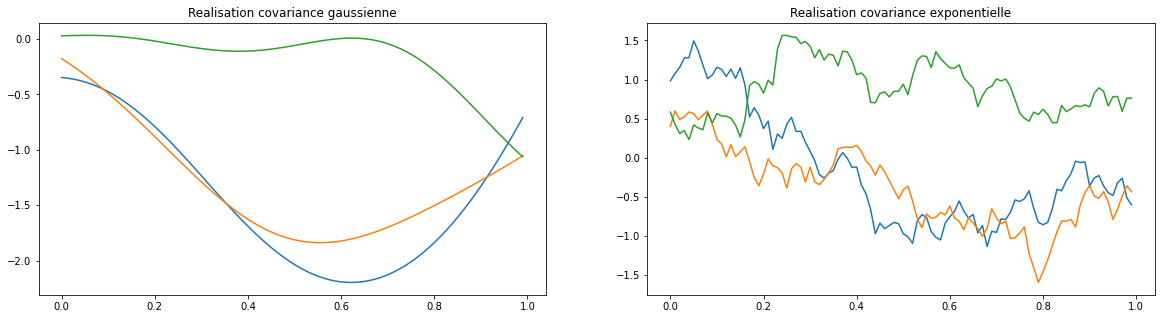

In [4]:
## type_cov: 'g'==covariance gaussienne ; sinon exponentielle 
def cov_matrix(X,theta,sigma,type_cov='e'):
    if type_cov=='g':
        return [[kg(x,z,theta,sigma) for z in X] for x in X]
    else: return [[ke(x,z,theta,sigma) for z in X] for x in X]

X=np.arange(0,1,0.01)  
mu=np.zeros(len(X))
Kg=cov_matrix(X,theta=0.5,sigma=1,type_cov='g')
Ke=cov_matrix(X,theta=0.9,sigma=1)

plt_valsg=[]
plt_valse=[]
for i in range(3):
    Yg=np.random.multivariate_normal(mu,Kg)  #N(mu,K)
    Ye=np.random.multivariate_normal(mu,Ke)  #N(mu,K)

    plt_valsg.extend([X,Yg])
    plt_valse.extend([X,Ye])

#GENERATION DE LA LOI NORMALE MULTIVARIATE
fig=plt.figure(1,figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(*plt_valsg)
plt.title('Realisation covariance gaussienne')
plt.subplot(1,2,2)
plt.plot(*plt_valse)
plt.title('Realisation covariance exponentielle')

3. On rappelle que $\mathbf{K}^{1/2} Z \sim \mathcal{N}(0, \mathbf{K})$ où $Z \sim \mathcal{N}(0, \mathbf{I})$ et $\mathbf{K}^{1/2}$ une matrice telle que $\mathbf{K}^{1/2}\mathbf{K}^{1/2} = \mathbf{K}$, obtenue par example par diagonalisation. Commenter l'effet de $\theta$ ($\theta = 0.1, 0.5, 0.05$),   $\sigma^2$ ($\sigma = 1, 10$) et du type de noyau sur les réalisations générées (e.g., 5-6 par configuration).

1) cherchons K1/2: --> on applique la decomposition de cholskey <br>
2) on genere un vecteur normal de taille N issu d'une normale multivariate de moyenne 0 et matrice de covariance l'identite <br>
3) on calcule aprs le produit scalaire de L avec le vecteur genere.

pourquoi c'est vrai??<br>
la matrice de covariance de y est :
E(yyT)=E(LzzTLT)=LE(zzT)LT=LLT=K

In [5]:
def generer(X,mu,theta,sigma,type_cov='e'):
    if type_cov=='g':
        K=cov_matrix(X,theta,sigma,'g')
        obs=np.random.multivariate_normal(mu,K)
    else: 
        K=cov_matrix(X,theta,sigma)
        L=np.linalg.cholesky(K)
        Z=np.random.normal(size=L.shape[0])
        obs=np.dot(L,Z)
    return obs

In [6]:
all_G=[]
all_Exp=[]
theta=[0.1,0.5,0.05]
sigma=[1,10]
for t in theta:
    for s in sigma:
        all_G.append(generer(X,mu,t,s,'g'))
        all_Exp.append(generer(X,mu,t,s))

Text(0.5, 1.0, 'theta=0.05 sigma=10')

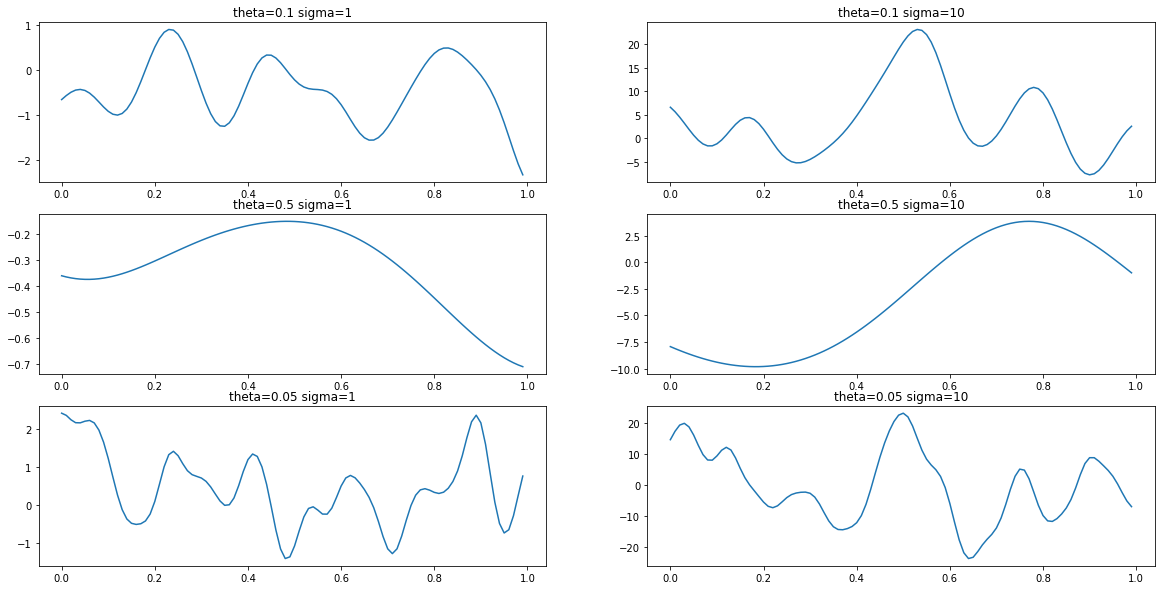

In [7]:
fig=plt.figure(1,figsize=(20,10))
plt.subplot(3,2,1)
plt.plot(X,all_G[0])
plt.title('theta=0.1 sigma=1')
plt.subplot(3,2,2)
plt.plot(X,all_G[1])
plt.title('theta=0.1 sigma=10')
plt.subplot(3,2,3)
plt.plot(X,all_G[2])
plt.title('theta=0.5 sigma=1')
plt.subplot(3,2,4)
plt.plot(X,all_G[3])
plt.title('theta=0.5 sigma=10')
plt.subplot(3,2,5)
plt.plot(X,all_G[4])
plt.title('theta=0.05 sigma=1')
plt.subplot(3,2,6)
plt.plot(X,all_G[5])
plt.title('theta=0.05 sigma=10')

Text(0.5, 1.0, 'theta=0.05 sigma=10')

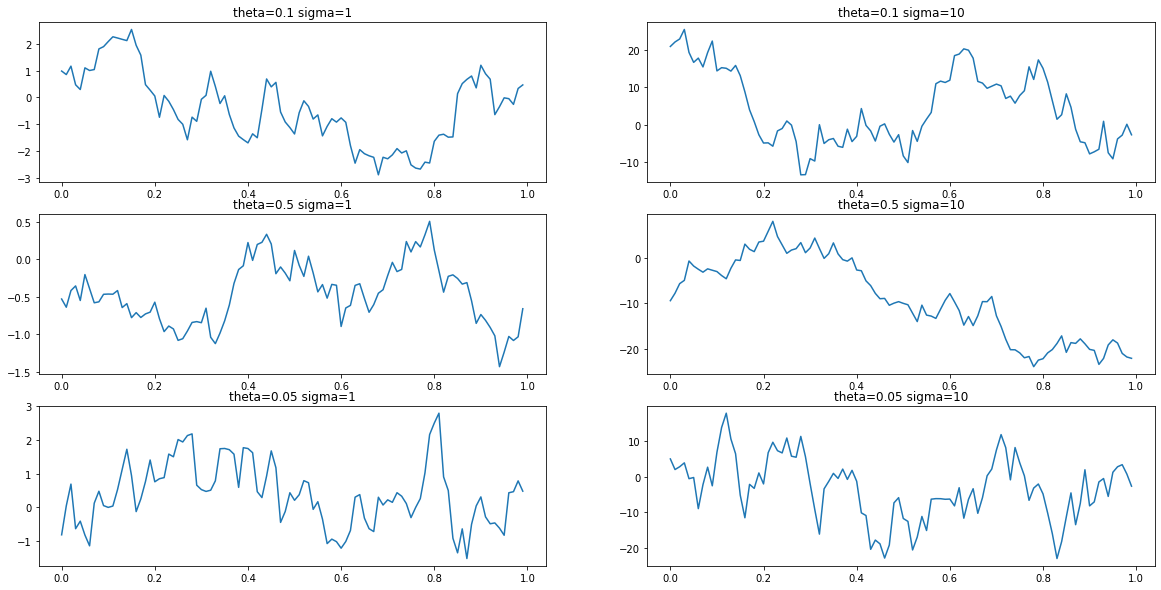

In [8]:
fig=plt.figure(1,figsize=(20,10))
plt.subplot(3,2,1)
plt.plot(X,all_Exp[0])
plt.title('theta=0.1 sigma=1')
plt.subplot(3,2,2)
plt.plot(X,all_Exp[1])
plt.title('theta=0.1 sigma=10')
plt.subplot(3,2,3)
plt.plot(X,all_Exp[2])
plt.title('theta=0.5 sigma=1')
plt.subplot(3,2,4)
plt.plot(X,all_Exp[3])
plt.title('theta=0.5 sigma=10')
plt.subplot(3,2,5)
plt.plot(X,all_Exp[4])
plt.title('theta=0.05 sigma=1')
plt.subplot(3,2,6)
plt.plot(X,all_Exp[5])
plt.title('theta=0.05 sigma=10')

On remarque que:
* plus theta augmente plus la fréquence des ossillations diminue.
* sigma controle l'amplitude des variances.
* les réalisations de la covariance gaussienne sont lisses (elles sont infiniment dérivables), tandis que celles de la covariance exponetielle ne le sont pas (elles sont juste continues).

### CONCLUSION 

* Une petite valeur de theta signifie que les valeurs de fonction qu'on modelise peuvent changer rapidement(grandes ossilations), des valeurs élevées caractérisent les fonctions qui ne changent que lentement.
<br>
* Le facteur sigma détermine la variation des valeurs de fonction à partir de leur moyenne. Une petite valeur de sigma caractérise les fonctions qui restent proches de leur valeur moyenne, des valeurs plus élevées permettent plus de variation.

# Partie 2 : Métamodélisation

On se place dans un cadre *black-box* et on considère que les évaluations
sont *chères*, on cherche donc à limiter au maximum le nombre d'appels à
$f$.

Dans un premier temps, on considère la fonction Branin modifiée (un seul
minimum global) :

$$f_b(x) = \left(x_2 - \frac{5.1}{4\pi^2} x_1^2 + \frac{5}{\pi} x_1 -6 \right)^2 + 10 \left[ \left(1 - \frac{1}{8 \pi} \right)  \cos{x_1} + 1 \right] + 5 x_1, ~ x_1 \in [-5,10], x_2 \in [0,15].$$

Il s'agit d'implémenter les fonctions qui interviennent dans la régression par processus gaussien (ou krigeage). Il pourra être utile d'avoir des fonctions pour calculer directement la matrice de covariance d'une matrice d'expériences $\mathbf{X}_n$ (i.e., $\mathbf{K}_n)$, ainsi que le vecteur de covariance entre un design $x$ et $\mathbf{X}_n$ (i.e., $k(x, \mathbf{X}_n) := k_n(x)$).


1. Pour la prédiction et la création de figures, on prendra une grille régulière $\mathcal{X}$ (e.g., de taille $51 \times 51$). Afficher $f_b$ sur $\mathcal{X}$.


In [9]:
def branin(x1,x2):
    return (x2-5.1/(4*np.pi**2)*x1**2+5/np.pi*x1-6)**2+10*((1-1/(8*np.pi))*np.cos(x1)+1)+5*x1

def branin_cube(x1,x2): #x1 and x2 are considered in [0,1]
    return branin(15*x1-5,15*x2)


2. Plan d'expériences initial ($\mathbf{X}_9$): pour simplifier, on prendra pour  la grille regulière $3 \times 3$ dans $[0,1]^2$. Evaluer les réponses correspondantes ($\textbf{y}_9$).



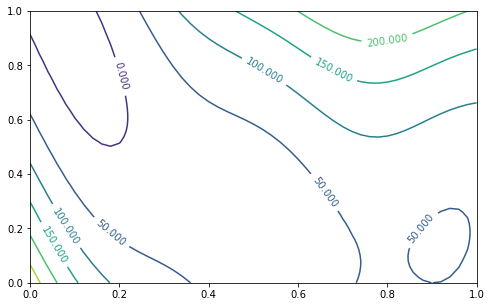

In [10]:
#représentation graphique de la fonction branin_cube
import matplotlib.pyplot as plt

fig = plt.figure(1,figsize=(8,5))
start,stop,n_values=0, 1, 51
x_vals = np.linspace(start,stop,n_values)
y_vals = np.linspace(start,stop,n_values)

#plot
X,Y = np.meshgrid(x_vals,y_vals)
Z= branin_cube(X,Y)
cp= plt.contour(X,Y,Z,5)
plt.clabel(cp,inline=True,fontsize=10)
plt.show()

In [11]:
branin_cube((5-np.pi)/15,12.275/15)

-15.310075910219227

In [12]:
#plan d'experience initial
xgrid= np.linspace(0,1,3)
X1=np.array(np.meshgrid(xgrid,xgrid)).T.reshape(-1,2)
print(X1)

#les reponse  qui lui correspond
y1 = branin_cube(X1[:,0],X1[:,1])
print(y1)

[[0.  0. ]
 [0.  0.5]
 [0.  1. ]
 [0.5 0. ]
 [0.5 0.5]
 [0.5 1. ]
 [1.  0. ]
 [1.  0.5]
 [1.  1. ]]
[283.12909601  81.56869776  -7.49170048  22.80790849  36.62996441
 162.95202034  60.96088904  72.16653996 195.87219088]


3. On prendra ici une covariance gaussienne avec $\theta = 0.2$. Afficher la moyenne et la variance de prédiction par krigeage/processus gaussien en fonction de $x_1$ et $x_2$ sur $\mathcal{X}$. 
   
   On rappelle que pour le krigeage simple, 
   $$m_n(\textbf{x}) = k_n(\textbf{x})^\top \mathbf{K}_n^{-1} \textbf{y}_n$$ 
   et 
   $$s_n^2(\textbf{x}) = k(\textbf{x}, \textbf{x}) - k_n(\textbf{x})^\top \mathbf{K}_n^{-1} k_n(\textbf{x}).$$ 

   De plus, l'estimateur $\hat{\sigma}^2_n$ obtenu par maximisation de la vraisemblance est $$\hat{\sigma}^2_n = \frac{1}{n} \textbf{y}_n^\top \mathbf{K}_n^{-1} \textbf{y}_n.$$ 

  Il peut être utile de sauver l'inverse de la matrice de covariance pour éviter de la recalculer.


In [13]:
def KG(x1,x2,theta,sigma):
    return (sigma**2)*np.exp((-(np.linalg.norm(x1-x2)**2))/(theta**2))
def covariance_matrix(X1,X2,theta,sigma):
    row1=len(X1)
    row2=len(X2)
    k = np.zeros((row1,row2))
    i=0
    for xi in X1:
        j=0
        for xj in X2:
            k[i,j]= kg(xi,xj,theta,sigma)
            j+=1
        i+=1
    return k

In [14]:
ngrid=100
xgrid=np.linspace(0,1,ngrid)
Xgrid= np.array(np.meshgrid(xgrid,xgrid)).T.reshape(-1,2)
Ygrid=branin_cube(Xgrid[:,0],Xgrid[:,1])
print(Xgrid)
K1=covariance_matrix(X1,X1,theta=0.2,sigma=1.0) #sigma is estimated 
invK1=np.linalg.inv(K1 + 1e-6*np.eye(len(X1)))
sigma2_hat1=(y1.T.dot(invK1).dot(y1))/len(y1)
kv1=covariance_matrix(Xgrid,X1,theta=0.2,sigma=1.0)
#Moyenne de prédiction par krige
m1=kv1.dot(invK1).dot(y1)
print(m1)
sn21=sigma2_hat1*(1-kv1.dot(invK1).dot(kv1.T))

RMSE1=np.sqrt(np.mean((Ygrid-m1)**2))

[[0.         0.        ]
 [0.         0.01010101]
 [0.         0.02020202]
 ...
 [1.         0.97979798]
 [1.         0.98989899]
 [1.         1.        ]]
[283.12881308 282.45236558 280.35647291 ... 193.97365421 195.41265477
 195.87199546]


on utilisant un plan d'experience uniforme (3*3) ,on a reussi a estimer les parametres de notre modele de krigage (moyenne et variance),
mais en introduisant la RMSE, on remarque qu'elle est elevee.

In [15]:
print(RMSE1)

48.92835832212857


4. Comparer le résultat de la prédiction lorsque le plan d'expérience $\mathbf{X}_9$ est un hypercube latin (LHS). Dans ce cas, afficher la moyenne et variance de prédiction en fonction de $x_1$ et $x_2$ sur $\mathcal{X}$. 
 
 Vous pouvez utiliser la librairie de votre choix pour générer un LHS. (*Optionnel*: sélectionner un LHS à partir du critère maximin, sans utiliser de librairie externe). 


In [16]:
# Latin Hypercube Sampling
def latin_hypercube_2d_uniform(n):
    lower_limits = np.arange(0,n)/n
    upper_limits = np.arange(1,n+1)/n

    points = np.random.uniform(low=lower_limits, high=upper_limits, size=[2,n]).T
    np.random.shuffle(points[:,1])

    return points

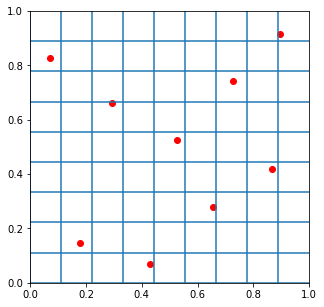

[[0.06919394 0.82874909]
 [0.17922601 0.14694163]
 [0.29208598 0.66063973]
 [0.42828889 0.06892765]
 [0.52567109 0.52702059]
 [0.65600798 0.27899055]
 [0.72610757 0.74135169]
 [0.86784883 0.41834205]
 [0.89536427 0.91570966]]


In [17]:
n=9
p = latin_hypercube_2d_uniform(n)

plt.figure(figsize=[5,5])
plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(p[:,0],p[:,1],c="r")
for i in np.arange(0,1,1/n):
    plt.axvline(i)
    plt.axhline(i)
plt.show()
print(p)

In [18]:
#latin hypercube sampling
ind = 10
RMSE2 = np.zeros(ind)
for i in range(ind):
    
    X2= latin_hypercube_2d_uniform(9)
    y2= branin_cube(X2[:,0],X2[:,1])

    K2=covariance_matrix(X2,X2,theta=0.2,sigma=1.0) #sigma is estimated 
    invK2=np.linalg.inv(K2 + 1e-6*np.eye(len(X2)))
    sigma2_hat2 = (y2.T.dot(invK2).dot(y2))/len(y2)
    kv2=covariance_matrix(Xgrid,X2,theta=0.2,sigma=1.0)
    #moyenne de predicton par krigage
    mn2=kv2.dot(invK2).dot(y2)
    #variance par krigeage
    snn2=sigma2_hat2*(1-kv2.dot(invK2).dot(kv2.T))

    #RMSE
    RMSE2[i]=np.sqrt(np.mean((Ygrid-mn2)**2))
print('rmse grille reguliere',RMSE1)
print('rmse grille de 10 LHS',RMSE2)
print('moyenne =',np.sum(RMSE2)/ind)

rmse grille reguliere 48.92835832212857
rmse grille de 10 LHS [40.10623291 41.33751572 42.66099859 52.98769477 52.02623848 45.67820134
 62.15890645 49.81339258 55.55022704 37.1787101 ]
moyenne = 47.94981179829657


D'apres les resultats suivants, on remarque que notre modele pour les meme parametres non optimaux (theta et sigma) de krigage,il se comporte d'une maniere similaire avec les deux plans d'experiences.

5. Utiliser la log-vraisemblance concentrée (en l'optimisant) pour estimer $\theta$, comparer au resultat précédent. en fonction de $x_1$ et $x_2$ sur $\mathcal{X}$. Afficher la moyenne et variance de prédiction avec les valeurs optimales.

 On rappelle que la log-vraisemblance concentrée s'écrit: 
$$\log \ell (\theta) = -\frac{n}{2} \log(2 \pi) - \frac{n}{2} \log \mathbf{y}_n^\top \mathbf{K}_n^{-1} \mathbf{y}_n - \frac{1}{2} \log |\mathbf{K}_n|.$$

In [19]:
from scipy.optimize import minimize

#vrai semblance
def vraisemblance(theta,X,y,eps):
    n= len(y)
    k = covariance_matrix(X,X,theta,1.0)+eps*np.eye(n)
    invK=np.linalg.inv(k)
    (sign,logdetK)=np.linalg.slogdet(k)
    nuhat =(y.T.dot(invK).dot(y))/n
    return n*np.log(2*np.pi)/2 + n*np.log(nuhat)/2+logdetK/2
#Optimisation
bnds=((0.001,1.0),)
res= minimize(vraisemblance,0.2,args=(X2,y2,1e-6,),bounds=bnds,method='L-BFGS-B')
theta_opt=res.x
print(theta_opt)

[0.43989122]


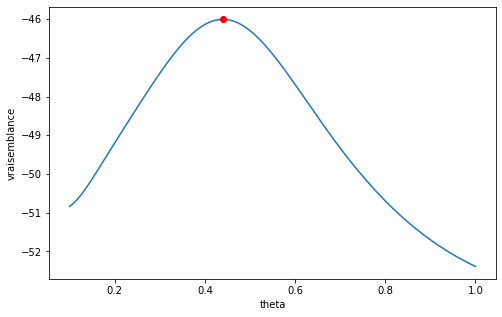

In [20]:
import matplotlib.pyplot as plt
theta=np.linspace(0.1,1,1000)
e=[-vraisemblance(t,X2,y2,1e-6) for t in theta]
plt.figure(figsize=(8,5))
plt.plot(theta,e)
plt.plot(theta_opt,-vraisemblance(theta_opt,X2,y2,1e-6),'ro')
plt.xlabel('theta')
plt.ylabel('vraisemblance')
plt.show()

Dans ce bloc, on s'est interesse a maximiser la fonction de vrai-semblace ce qui revient a minimiser la -1*log(l(theta)) afin d'extraire le theta optimum <br>.


### RESULTAT

theta optimum=0.43

In [21]:
ind = 10
RMSE3 = np.zeros(ind)
for i in range(ind):
    
    X2= latin_hypercube_2d_uniform(9)
    y2= branin_cube(X2[:,0],X2[:,1])
    #using optimal_parameter
    K3=covariance_matrix(X2,X2,theta=theta_opt,sigma=1.0)#sigma
    invK3 = np.linalg.inv(K3+1e-6*np.eye(len(X2)))
    sigma2_hat3=(y2.T.dot(invK3).dot(y2))/len(y2)
    kv3=covariance_matrix(Xgrid,X2,theta=theta_opt,sigma=1.0)

    #moyenne de prédiction par krigeage
    mn3=kv3.dot(invK3).dot(y2)
    #variance de prediction par krigeage
    sn23=sigma2_hat3*(1-kv3.dot(invK3).dot(kv3.T))
    RMSE3[i]=np.sqrt(np.mean((Ygrid-mn3)**2))
print('rmse grille reguliere',RMSE1)
print('rmse grille de 10 LHS',RMSE2)
print('moyenne =',np.sum(RMSE2)/ind)
print('rmse grille de 10 LHS avec theta optimal',RMSE3)
print('moyenne =',np.sum(RMSE3)/ind)

rmse grille reguliere 48.92835832212857
rmse grille de 10 LHS [40.10623291 41.33751572 42.66099859 52.98769477 52.02623848 45.67820134
 62.15890645 49.81339258 55.55022704 37.1787101 ]
moyenne = 47.94981179829657
rmse grille de 10 LHS avec theta optimal [37.2804097  24.63950481 48.66634823 34.6314753  25.66141769 35.02520273
 28.46910751 28.29539778 33.55224456 29.82464757]
moyenne = 32.604575587316354


Text(0, 0.5, 'RMSE')

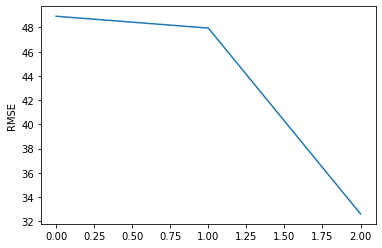

In [22]:
plt.plot([RMSE1,np.sum(RMSE2)/ind,np.sum(RMSE3)/ind])
plt.ylabel('RMSE')

on remarque qu'après la maximisation de la fonction de vraisemblance ainsi qu'avec le plan d'experience LHS, la RMSE a diminue d'une facon remarquable ce qui a génere un modéle plus précis. 

# Partie 3 : EGO

On utilise maintenant les fonctions précédemment développées pour implémenter l'algorithme EGO.

1. Ecrire la fonction d'amélioration espérée **EI** qui prend en entrée un nouveau design, et retourne l'amélioration espérée correspondante. Tracer la fonction EI en fonction de $x_1$ et $x_2$. Rappel: 
	$$E[I(\textbf{x})|\mathbf{X}_n, \mathbf{y}_n ] = \left(t_n - m_n(\textbf{x})\right)\Phi\left(\frac{t_n - m_n(\textbf{x})}{s_n(\textbf{x})} \right)+s_n(\textbf{x})\phi\left(\frac{t_n - m_n(\textbf{x})}{s_n(\textbf{x})} \right),$$
où $\phi$ et $\Phi$ sont la densité et la fonction de répartition de la loi normale standard, $t_{n}=\min _{1 \leq i \leq n} y_{i}.$



In [23]:
from scipy.stats import norm
def EI(x,theta,sigma2,invK,X,y):
    Xs=np.vstack((X,x)) #XS=(X en haut et x1 x2 sous X )
    kvec=covariance_matrix(Xs,X,theta=theta,sigma=1.0)
    mn=kvec.dot(invK).dot(y)
    sn2=sigma2*(1-kvec.dot(invK).dot(kvec.T))
    f_min=min(y)
    arg=(f_min-mn)/np.sqrt(sn2)
    res=(f_min-mn)*norm.cdf(arg)+np.sqrt(sn2)*norm.pdf(arg)
    res=np.linalg.norm(res,np.inf)
    return -res #this EI needs to be maximized

2. Ecrire la fonction **EGO_one_step** qui maximise l'EI sur le domaine de conception. Justifier le choix de l'algorithme d'optimisation utilisé.


In [26]:
def EGO_one_step(X,y):
    n=len(y)
    
    #i)optimize hyperparameters
    bndsVS=((0.001,1.0),)
    resVS=minimize(vraisemblance,0.2,args=(X,y,1e-6),bounds=bndsVS,method='L-BFGS-B')
    theta=resVS.x
    #ii)model fit
    K = covariance_matrix(X,X,theta=theta,sigma=1.0) #sigma estimate dby plugin
    invK=np.linalg.inv(K+1e-6*np.eye(n))
    sigma2_hat=(y.T.dot(invK).dot(y))/n
    #ii)EI optimisation
    bndsEI=((0.001,1.0),(0.001,1.0),)
    resEI=minimize(EI,x0=[0.1,0.1],args=(theta,sigma2_hat,invK,X,y,),bounds=bndsEI,method='L-BFGS-B')
    return resEI

3. Regarder la performance sur 21 pas (budget total de 30 évaluations). Comparer à d'autres méthodes d'optimisation (e.g., descente de gradient, recherche aléatoire).

In [27]:
x2=latin_hypercube_2d_uniform(9)
y2=branin_cube(X2[:,0],X2[:,1])
x0=x2
y0=y2
all_y=[]
nsteps=21
for i in range(nsteps):
    #find the best new point
    res= EGO_one_step(x0,y0) #xnw
    Xnew=res.x
    
    #evaluate it
    ynew=branin_cube(Xnew[0],Xnew[1])
    
    #add new point to pprevious points
    x0=np.vstack((x0,Xnew))
    y0=np.hstack((y0,ynew))
    all_y.append(ynew)
    print('Xnew :',Xnew,'-> ynew : ',ynew)

Xnew : [0.001      0.57590882] -> ynew :  60.003967284402464
Xnew : [0.001 0.001] -> ynew :  281.0677092510722
Xnew : [1. 1.] -> ynew :  195.87219087939556
Xnew : [0.36411937 0.53466117] -> ynew :  28.34363981282246
Xnew : [0.41170376 0.60085648] -> ynew :  41.714530002148166
Xnew : [1. 1.] -> ynew :  195.87219087939556
Xnew : [0.10019327 0.10017053] -> ynew :  119.07553561580063
Xnew : [0.001     0.7794959] -> ynew :  17.381367068582453
Xnew : [0.45811345 1.        ] -> ynew :  149.36905140165658
Xnew : [0.17113613 0.68864377] -> ynew :  -9.36083639825257
Xnew : [0.06632788 0.69365586] -> ynew :  0.07021751113250474
Xnew : [0.17239424 1.        ] -> ynew :  10.162389994849747
Xnew : [0.16649619 1.        ] -> ynew :  7.487145977309579
Xnew : [0.06655556 1.        ] -> ynew :  -15.956194903927633
Xnew : [0.05226082 1.        ] -> ynew :  -15.652696223537388
Xnew : [0.06433794 1.        ] -> ynew :  -15.96777452302679
Xnew : [0.06437109 1.        ] -> ynew :  -15.967761813651991
Xnew : 

In [28]:
def cost(u):
    x1=15*u[0]-5
    x2=15*u[1]
    grad=np.array([2*(-5.1*x1/(2*(np.pi**2))+5/np.pi)*(x2-5.1*(x1**2)/(4*(np.pi**2))+5*x1/np.pi-6)-10*np.sin(x1)+5/(4*np.pi)*np.sin(x1)+5,2*(x2-5.1*(x1**2)/(4*(np.pi**2))+5*x1/np.pi-6)])
    return branin(x1,x2),grad

In [29]:
N=2 ; #nombre de variables d'optimisation (ou dimension du probleme)
EPSG = 1.e-17; # tolerance sur la norme du gradient
Kmax = 3000 ; # nombre max d'iterations

# Pour le gradient à pas fixe : le pas est
eta = 0.02 ;

# First guess : u0
u0 = np.array([1,0.001])
k=1
J,grad=cost(u0)
print(J)
# Iterations de descente
while J!=0 and np.linalg.norm(grad)>EPSG and k<Kmax:
    u0=u0-eta*grad
    J,grad=cost(u0)
    k+=1

print('le minimum present ',u0)
print('valeur J associe au minimum ',J) ;

60.87102533749524
le minimum present  [0.5259241  0.27199091]
valeur J associe au minimum  17.70568056917331


On remarque qu'apres 3000 iterations pour la methode de la descente du gradient, on est toujours loin de notre minimum, pourtant avec 21 pas seulement de la methode ECG, on reussi a extraire une valeur minimal de notre fonction boite noire. Pour cet Example X=[0.06442111 1.        ]